
📦 Estoque Atual: 90 cestas básicas
🔼 Total Recebido: 210
🔽 Total Distribuído: 120


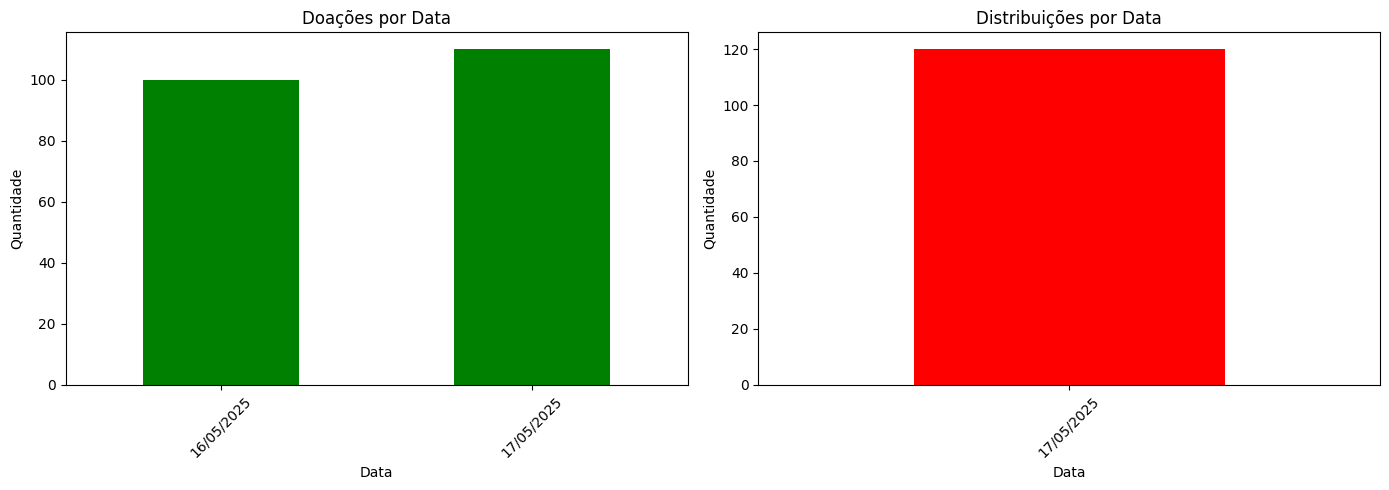

In [1]:
# Instalar dependências (execute apenas uma vez)
!pip install ipywidgets --quiet
!pip install pandas matplotlib --quiet # Garantir que pandas e matplotlib estão instalados

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
# Não é possível importar diretamente bibliotecas para busca web em tempo real aqui
# como 'requests', 'beautifulsoup4' ou interagir com APIs de busca sem configuração e chaves.

# Inicialização dos dados
doacoes = pd.DataFrame(columns=["Data", "Responsável", "Quantidade"])
distribuicoes = pd.DataFrame(columns=["Data", "Responsável", "Quantidade"])

# Função para registrar doações
def registrar_doacao(data, responsavel, quantidade):
    global doacoes
    nova = pd.DataFrame([[data, responsavel, int(quantidade)]], columns=doacoes.columns)
    doacoes = pd.concat([doacoes, nova], ignore_index=True)
    print("✅ Doação registrada com sucesso!") # Feedback imediato

# Função para registrar distribuições
def registrar_distribuicao(data, responsavel, quantidade):
    global distribuicoes
    nova = pd.DataFrame([[data, responsavel, int(quantidade)]], columns=distribuicoes.columns)
    distribuicoes = pd.concat([distribuicoes, nova], ignore_index=True)
    print("✅ Distribuição registrada com sucesso!") # Feedback imediato

# Função para mostrar estoque atual
def mostrar_estoque():
    entradas = doacoes["Quantidade"].sum()
    saidas = distribuicoes["Quantidade"].sum()
    saldo = entradas - saidas
    print(f"\n📦 Estoque Atual: {saldo} cestas básicas")
    print(f"🔼 Total Recebido: {entradas}")
    print(f"🔽 Total Distribuído: {saidas}")

# Função para exibir gráficos
def mostrar_graficos():
    if not doacoes.empty or not distribuicoes.empty:
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))

        # Gráfico de Doações
        if not doacoes.empty:
            doacoes.groupby("Data")["Quantidade"].sum().plot(kind="bar", ax=ax[0], color="green")
            ax[0].set_title("Doações por Data")
            ax[0].set_ylabel("Quantidade")
            ax[0].tick_params(axis='x', rotation=45)
        else:
            ax[0].set_title("Doações por Data")
            ax[0].text(0.5, 0.5, 'Sem dados de doação', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
            ax[0].tick_params(axis='x', rotation=45)


        # Gráfico de Distribuições
        if not distribuicoes.empty:
            distribuicoes.groupby("Data")["Quantidade"].sum().plot(kind="bar", ax=ax[1], color="red")
            ax[1].set_title("Distribuições por Data")
            ax[1].set_ylabel("Quantidade")
            ax[1].tick_params(axis='x', rotation=45)
        else:
            ax[1].set_title("Distribuições por Data")
            ax[1].text(0.5, 0.5, 'Sem dados de distribuição', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)
            ax[1].tick_params(axis='x', rotation=45)


        plt.tight_layout()
        plt.show()
    else:
        print("\nNão há dados de doação ou distribuição para gerar gráficos.")


# --- NOVA FUNÇÃO PARA BUSCAR ESTATÍSTICAS ---
def buscar_estatisticas_regionais(b):
    clear_output(wait=True)
    display(ui)
    print("📊 Buscando estatísticas regionais (simulado)...")
    print("\nPara encontrar estatísticas atualizadas sobre a distribuição de cestas básicas no Nordeste do Brasil, você pode consultar:")
    print("- Relatórios de ONGs que atuam na região (Ex: Ação da Cidadania, Amigos do Bem).")
    print("- Dados de órgãos governamentais (Ex: MDS - Ministério do Desenvolvimento Social, CONAB).")
    print("- Pesquisas sobre segurança alimentar (Ex: dados do IBGE, pesquisas universitárias).")
    print("\nVocê pode usar termos de busca como: 'distribuição cestas básicas nordeste dados', 'fome nordeste estatísticas', 'segurança alimentar nordeste'.")
    # Aqui você poderia adicionar dados estáticos que você já encontrou, por exemplo:
    # print("\nAlguns dados de referência (pesquisados em Maio/2025):")
    # print("- [Fonte Exemplo]: X cestas básicas distribuídas em Y estado em 2024.")

# Widgets de entrada
data_input = widgets.Text(value='', placeholder='DD-MM-YYYY', description='Data:')
responsavel_input = widgets.Text(value='', placeholder='Nome', description='Responsável:')
quantidade_input = widgets.BoundedIntText(value=1, min=1, max=1000, description='Quantidade:')

# Botões de ação
botao_doacao = widgets.Button(description="Registrar Doação", button_style='success')
botao_distribuicao = widgets.Button(description="Registrar Distribuição", button_style='danger')
botao_relatorio = widgets.Button(description="Mostrar Relatório", button_style='info')
# --- NOVO BOTÃO ---
botao_estatisticas = widgets.Button(description="Buscar Estatísticas Regionais", button_style='primary')


# Ações dos botões (atualizadas para limpar e exibir a UI antes do feedback)
def ao_clicar_doacao(b):
    clear_output(wait=True)
    display(ui)
    registrar_doacao(data_input.value, responsavel_input.value, quantidade_input.value)


def ao_clicar_distribuicao(b):
    clear_output(wait=True)
    display(ui)
    registrar_distribuicao(data_input.value, responsavel_input.value, quantidade_input.value)


def ao_clicar_relatorio(b):
    clear_output(wait=True)
    display(ui)
    mostrar_estoque()
    mostrar_graficos()

botao_doacao.on_click(ao_clicar_doacao)
botao_distribuicao.on_click(ao_clicar_distribuicao)
botao_relatorio.on_click(ao_clicar_relatorio)
# --- LIGAR NOVO BOTÃO À FUNÇÃO ---
botao_estatisticas.on_click(buscar_estatisticas_regionais)


# Interface final (atualizada para incluir o novo botão)
ui = widgets.VBox([
    widgets.Label("📋 Preencha os dados da operação:"),
    data_input,
    responsavel_input,
    quantidade_input,
    widgets.HBox([botao_doacao, botao_distribuicao, botao_relatorio, botao_estatisticas]) # Adicionado o novo botão aqui
])

display(ui)
